# Individual household electric power consumption Data Set.

In [124]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data prep

In [20]:
_float = lambda x: np.float64(x) if x not in ["?", ""] else np.nan

household = pd.read_csv(
    "household.csv",
    delimiter=";",
    converters={
        "Date": str,
        "Time": str,
        "Global_active_power": _float,
        "Global_reactive_power": _float,
        "Voltage": _float,
        "Global_intensity": _float,
        "Sub_metering_1": _float,
        "Sub_metering_2": _float,
        "Sub_metering_3": _float,
    }
)

In [21]:
household.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0

In [60]:
nb_tot = household.shape[0]
nb_nan = household[household.isna().any(axis=1)].shape[0]

print(f"Got {nb_tot:,} rows, {nb_nan:,} with missing values : {nb_nan/nb_tot:.1%}")

Got 2,075,259 rows, 25,979 with missing values : 1.3%


In [92]:
household_clear = household[~household.isna().any(axis=1)]
household_clear["Datetime"] = pd.to_datetime(household_clear["Date"] + " " + household_clear["Time"], format="%d/%m/%Y %H:%M:%S")
household_clear.pop('Time')
household_clear["Date"] = pd.to_datetime(household_clear["Date"], format="%d/%m/%Y")
household_clear.set_index("Datetime", inplace=True)

<ipython-input-92-52b8a644c086>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_clear["Datetime"] = pd.to_datetime(household_clear["Date"] + " " + household_clear["Time"], format="%d/%m/%Y %H:%M:%S")
<ipython-input-92-52b8a644c086>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_clear["Date"] = pd.to_datetime(household_clear["Date"], format="%d/%m/%Y")


## Data analysis

Afficher le graphique des moyennes journalières entre le 1er janvier et le 30 avril 2007.

In [126]:
power = household_clear.loc[pd.to_datetime("2007-01-01"):pd.to_datetime("2007-04-30")].groupby("Date").mean()["Global_active_power"]

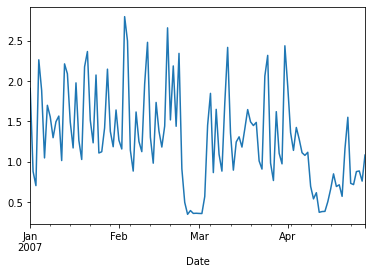

In [127]:
power.plot()
plt.show()

## Temperatures

In [128]:
temps = (x := pd.read_csv("temps.csv", index_col="DATE", parse_dates=True).loc[pd.to_datetime("2007-01-01"):pd.to_datetime("2007-04-30")]["TG"]/10)[x != -999.9]

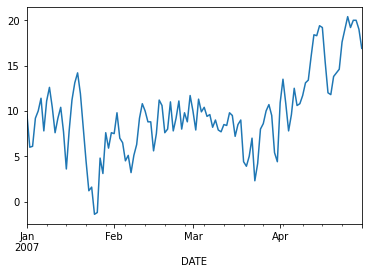

In [129]:
temps.plot()
plt.show()

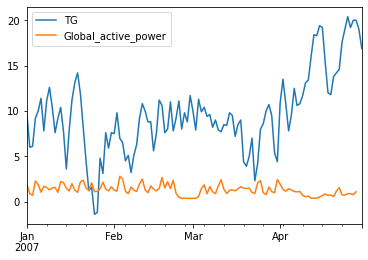

In [141]:
pd.concat([pd.DataFrame(temps), pd.DataFrame(power)], axis=1).plot()
plt.show()

## Pollution

In [164]:
_conv = lambda u: int(u) if u != "n/d" else np.nan

pollution = pd.read_csv(
    "polution.csv",
    delimiter=";",
    parse_dates=True,
    converters={
        "NO2": _conv,
        "O3": _conv
    }
).groupby("date").mean()[["NO2", "O3"]]

In [172]:
pollution.index = pd.DatetimeIndex(pollution.index)

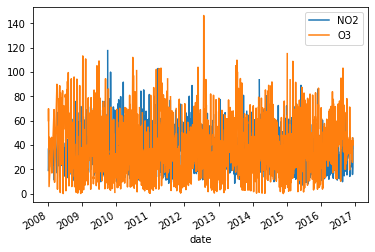

In [179]:
pollution.plot()
plt.show()